<a href="https://colab.research.google.com/github/Vj-Ydv/Suicidal_sentiment_analysis/blob/main/Confusion_Matrix_Suicidal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This cell connects to google drive, authenticates connection, and iterates over file list displaying each file's title and ID.
# it also imports and installs all the necessary libraries
!pip install -U -q PyDrive
!pip install -U -q wordcloud
!pip install -U -q bokeh
!pip install textblob
!pip install sklearn

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup

from wordcloud import WordCloud
from scipy.stats import hmean
from scipy.stats import norm
from pylab import *
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.models import LinearColorMapper
from bokeh.models import HoverTool

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

from time import time

  

     |████████████████████████████████| 366 kB 4.2 MB/s 
     |████████████████████████████████| 18.5 MB 2.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 0.12.1 requires bokeh<2.4.0,>=2.3.0, but you have bokeh 2.4.2 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [ ]:
# upload file into pandas dataframe and drop unnecessary columns and neutral rows

# Using columns 1,2 because col 0 is the number of the row, could be changed if the row number is removed from the csv file.
df_clean = pd.read_csv('Dataset_For_Project/clean_Tweets_suicidal.csv', usecols = [0,1], encoding='latin-1')
df_clean.head()

,text,target
0,yo assignment can you finish by yourself i wan...,Negative
1,lee su-hyeok iss .. btw i'm just in ep kahdk...,Negative
2,"on one hand, i want to finish what i started i...",Negative
3,i want to finish this so badly but her coat ia...,Negative
4,me trying to finish the drawing for my sister ...,Negative


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_clean)

In [ ]:
print(train.shape)
#print(test.shape)

(18051, 2)


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train['target'] = labelencoder.fit_transform(train['target'])
test['target'] = labelencoder.fit_transform(test['target'])

# **Word Embedding Techniques**

In [ ]:
# 1 Bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(binary=True)
cv.fit(train)
X_train_bow = cv.fit_transform(train['text'])
X_test_bow = train['target']
Y_train_bow = cv.transform(test['text'])
Y_test = test['target']

In [ ]:
# 2 TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(norm = None)
vectorizer.fit(train)
X_train_tfidf = vectorizer.fit_transform(train['text'])
X_test_tfidf = train['target']
Y_train_tdidf =vectorizer.transform(test['text'])

In [ ]:
# 3 Hashing
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer()
hv.fit(train)
X_train_hash = hv.fit_transform(train['text'])
X_test_hash = train['target']
Y_train_hash = hv.transform(test['text'])

# **Accuracy calculation of various models using various word embedding techniques**

In [ ]:
from sklearn.model_selection import cross_val_score


In [ ]:
# Rigde with bag of word
from sklearn import linear_model
alpha = [80.0, 90.0, 100.0, 110.0, 120.0]
for a in alpha:
    ridge = linear_model.RidgeClassifier(a)
    scores = cross_val_score(ridge, X_train_bow, X_test_bow, cv=5, scoring='f1')
    print("alpha: ",a)
    print(scores)
    print(np.mean(scores))
    print('\n')

alpha:  80.0
[0.85580247 0.85749568 0.85813492 0.85064293 0.85770556]
0.8559563118543702


alpha:  90.0
[0.85488648 0.85686081 0.85707208 0.85016045 0.85756458]
0.8553088796751858


alpha:  100.0
[0.85425401 0.85636723 0.85622371 0.84848485 0.85587801]
0.8542415603473051


alpha:  110.0
[0.85326757 0.85566247 0.85403803 0.84778325 0.85307125]
0.8527645163056352


alpha:  120.0
[0.8530572  0.85566247 0.85212661 0.84653222 0.85272459]
0.8520206184324817




In [ ]:
# MultinomialNB with bag of word
from sklearn.naive_bayes import MultinomialNB
alpha = [1e-10, 1e-5, 0.1, 1.0, 2.0, 5.0]
for a in alpha:
    mnb = MultinomialNB()
    scores = cross_val_score(mnb, X_train_bow, X_test_bow, cv=5, scoring='f1')
    print('alpha: ', a)
    print(scores)
    print(np.mean(scores))
    print('\n')

alpha:  1e-10
[0.79476744 0.78796903 0.78867362 0.80106257 0.78773723]
0.7920419785144458


alpha:  1e-05
[0.79476744 0.78796903 0.78867362 0.80106257 0.78773723]
0.7920419785144458


alpha:  0.1
[0.79476744 0.78796903 0.78867362 0.80106257 0.78773723]
0.7920419785144458


alpha:  1.0
[0.79476744 0.78796903 0.78867362 0.80106257 0.78773723]
0.7920419785144458


alpha:  2.0
[0.79476744 0.78796903 0.78867362 0.80106257 0.78773723]
0.7920419785144458


alpha:  5.0
[0.79476744 0.78796903 0.78867362 0.80106257 0.78773723]
0.7920419785144458




In [ ]:
# Rigde with TF-IDF
alpha = [500.0, 1500.0, 2500.0, 3000.0]
for a in alpha:
    ridge = linear_model.RidgeClassifier(a)
    scores = cross_val_score(ridge, X_train_tfidf, X_test_tfidf, cv=5, scoring='f1')
    print("alpha: ",a)
    print(scores)
    print(np.mean(scores))
    print('\n')

alpha:  500.0
[0.86190595 0.87352276 0.87597484 0.87061184 0.86910995]
0.8702250657033668


alpha:  1500.0
[0.86052826 0.8677275  0.86846039 0.86309524 0.86208601]
0.8643794801985585


alpha:  2500.0
[0.85833949 0.86590797 0.8655754  0.85643687 0.85672083]
0.8605961099316352


alpha:  3000.0
[0.85665025 0.86194122 0.86428925 0.85671937 0.85552826]
0.8590256683163888




In [ ]:
# MultinomialNB with TF-IDF
alpha = [175.0, 200.0, 225.0, 250.0, 300.0]
for a in alpha:
    mnb = MultinomialNB()
    scores = cross_val_score(mnb, X_train_tfidf, X_test_tfidf, cv=5, scoring='f1')
    print('alpha: ', a)
    print(scores)
    print(np.mean(scores))
    print('\n')

alpha:  175.0
[0.7748307  0.76573427 0.75900439 0.76914153 0.76571429]
0.7668850349863707


alpha:  200.0
[0.7748307  0.76573427 0.75900439 0.76914153 0.76571429]
0.7668850349863707


alpha:  225.0
[0.7748307  0.76573427 0.75900439 0.76914153 0.76571429]
0.7668850349863707


alpha:  250.0
[0.7748307  0.76573427 0.75900439 0.76914153 0.76571429]
0.7668850349863707


alpha:  300.0
[0.7748307  0.76573427 0.75900439 0.76914153 0.76571429]
0.7668850349863707




In [ ]:
# Rigde with Hash
alpha = [1.1, 1.2, 1.3, 1.4, 1.5, 2.0]
for a in alpha:
    ridge = linear_model.RidgeClassifier(a)
    scores = cross_val_score(ridge, X_train_hash, X_test_hash, cv=5, scoring='f1')
    print("alpha: ",a)
    print(scores)
    print(np.mean(scores))
    print('\n')

alpha:  1.1
[0.88543287 0.8908046  0.89184953 0.88079644 0.8798127 ]
0.8857392252707449


alpha:  1.2
[0.88526289 0.88958496 0.89155997 0.88069074 0.88010403]
0.8854405175421697


alpha:  1.3
[0.88411795 0.88865711 0.89132706 0.88029273 0.87821345]
0.8845216611390974


alpha:  1.4
[0.88308329 0.88894682 0.88958496 0.88064769 0.87850467]
0.8841534872352252


alpha:  1.5
[0.88217054 0.88825215 0.88900469 0.87937337 0.87827667]
0.883415483450696


alpha:  2.0
[0.87967019 0.88300908 0.88744476 0.87714732 0.87798546]
0.8810513621136902




## **Accuracy calculation**

In [ ]:
from sklearn.metrics import accuracy_score
ridge = linear_model.RidgeClassifier(1.2)
ridge.fit(X_train_hash, X_test_hash)
test['sentiment_pred'] = ridge.predict(Y_train_hash)
y_true = test['target']
y_pred = test['sentiment_pred']
accuracy_score(y_true, y_pred)*100

87.93619142572282

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_true, y_pred, target_names = ['Negative','Positive']))

              precision    recall  f1-score   support

    Negative       0.89      0.86      0.87      2921
    Positive       0.87      0.90      0.88      3097

    accuracy                           0.88      6018
   macro avg       0.88      0.88      0.88      6018
weighted avg       0.88      0.88      0.88      6018



## **Confusion matrix**

Text(51.0, 0.5, 'Actual')

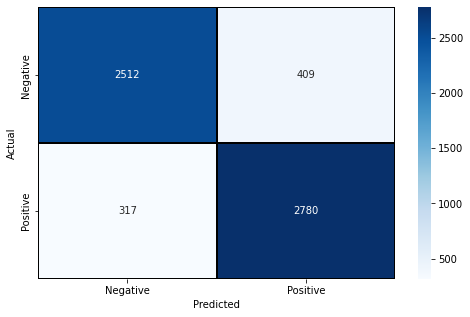

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize = (8,5))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['Negative','Positive'], 
            yticklabels = ['Negative','Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")